<a href="https://colab.research.google.com/github/gmb408/OSSP-KBO-prediction/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 데이터 분석 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [12]:
result = pd.read_csv("/content/statiz_pre.csv", index_col=0)

In [3]:
print("&lt;전체 column 타입확인&gt;\n\n",result.dtypes.value_counts())
print()
print("&lt;object type columns&gt;\n\n",result.columns[result.dtypes=='object'])

&lt;전체 column 타입확인&gt;

 float64    26
object      4
int64       3
dtype: int64

&lt;object type columns&gt;

 Index(['이름', '생일', '팀', '포지션'], dtype='object')


In [13]:
new = ['ID','NAME','BDAY','TEAM','YEAR','POSIT','AGE','G','PA','AB','RUN','H','2H','3H','HR','BASE','RBI','SB','CS','BB','HB','IBB','K','DP'\
       ,'SH','SF','AVG','OBP','SLG','OPS','wOBA','wRC+','WAR+']
i = 0
for col_name in result.columns:
   result.rename(columns = {col_name : new[i]}, inplace = True)
   i = i+1


In [ ]:
# Find correlations with the target and sort
correlations = result.corr()['OPS'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(11))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 H       0.615760
HR      0.627564
RBI     0.655248
BASE    0.666266
WAR+    0.702562
OBP     0.889325
wRC+    0.892995
AVG     0.925092
wOBA    0.939552
SLG     0.972927
OPS     1.000000
Name: OPS, dtype: float64

Most Negative Correlations:
 ID     -0.365626
SH     -0.084705
YEAR    0.081538
AGE     0.134244
SB      0.194780
CS      0.208973
3H      0.248039
HB      0.380749
DP      0.413454
SF      0.418243
Name: OPS, dtype: float64


Text(0.5, 1.0, 'Top 10 correlations with OPS')

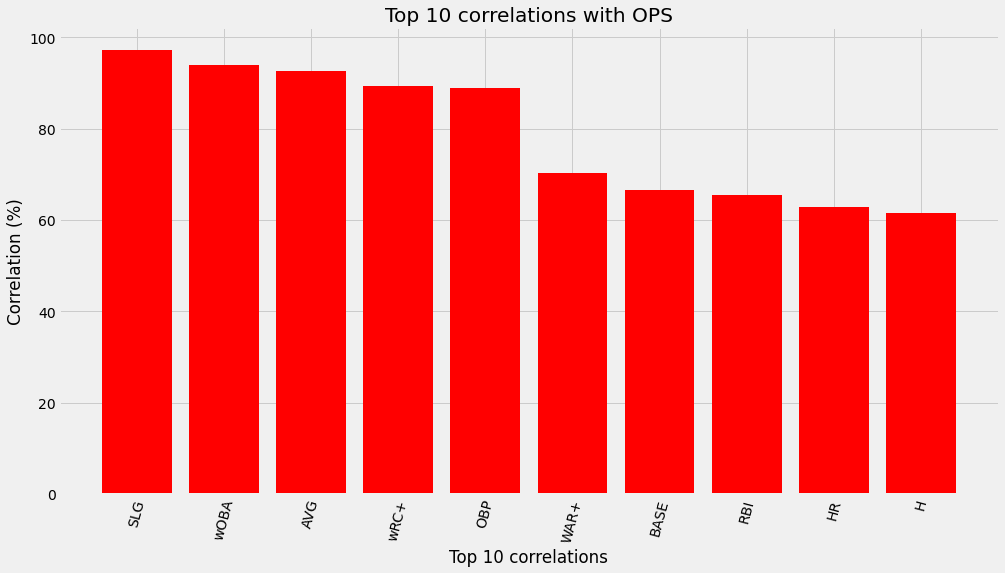

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

plt.bar(correlations.tail(11)[:-1].index.astype(str)[::-1], 100*correlations.tail(11)[:-1][::-1],color='r')

# Plot labeling
plt.xticks(rotation=75) ; plt.xlabel('Top 10 correlations'); plt.ylabel('Correlation (%)');
plt.title('Top 10 correlations with OPS')

Text(0.5, 1.0, 'Low 8 correlations with OPS')

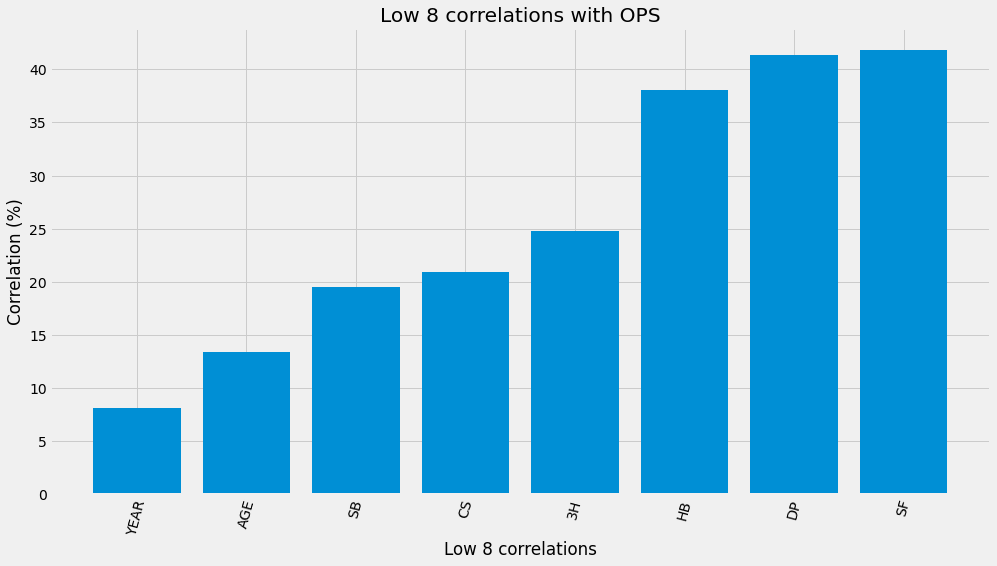

In [ ]:
plt.figure(figsize=(15,8))

plt.bar(correlations.head(10)[2:].index.astype(str), 100*correlations.head(10)[2:])

# Plot labeling
plt.xticks(rotation=75) ; plt.xlabel('Low 8 correlations'); plt.ylabel('Correlation (%)')
plt.title('Low 8 correlations with OPS')

Top 5. High correlation with 'OPS' Pair Plot


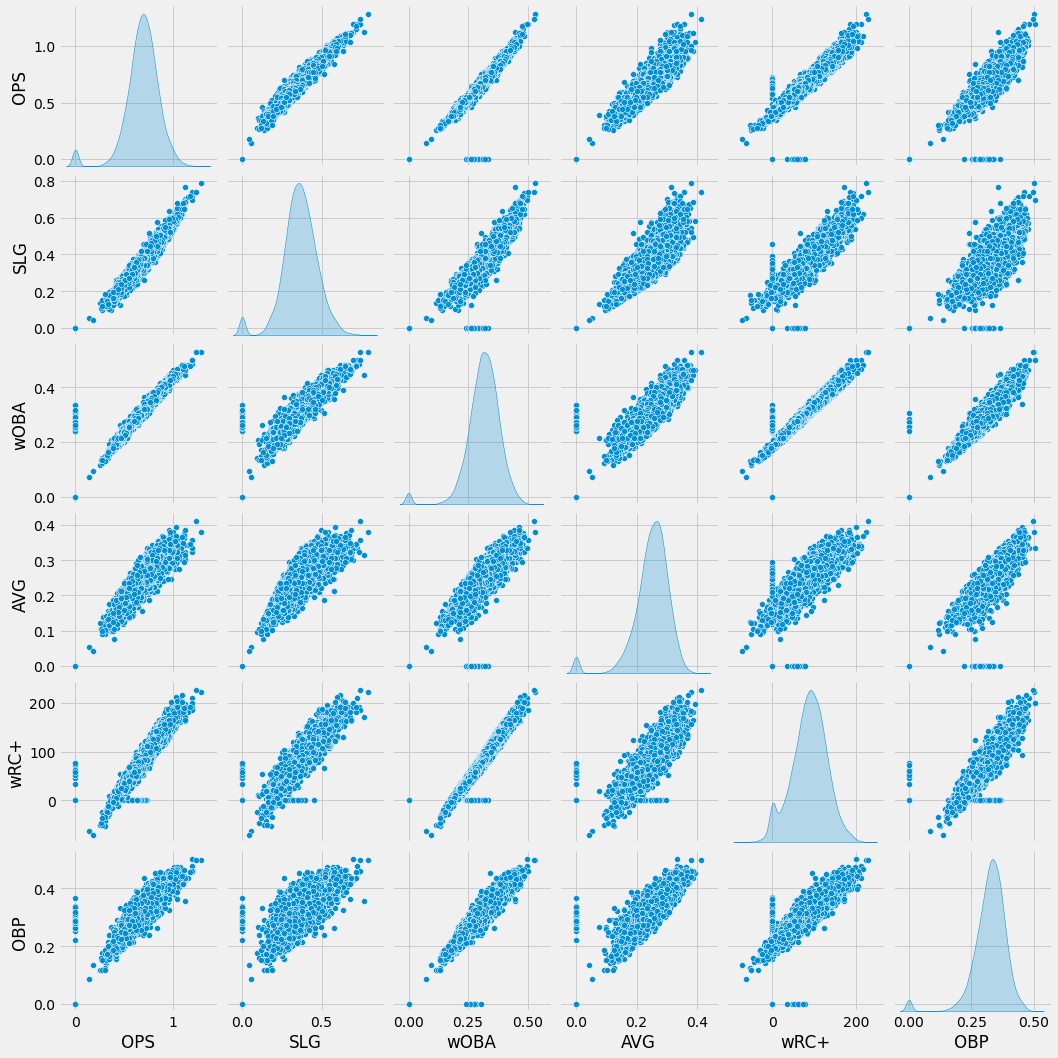

In [ ]:
#Top 5. High correlation with 'OPS' Pair Plot
print("Top 5. High correlation with 'OPS' Pair Plot")
high_corr = result.loc[:,list(correlations.tail(6)[::-1].index)]
sns.pairplot(high_corr,diag_kind='kde')
plt.show()

Top5. Low correlation with 'OPS' Pair Plot


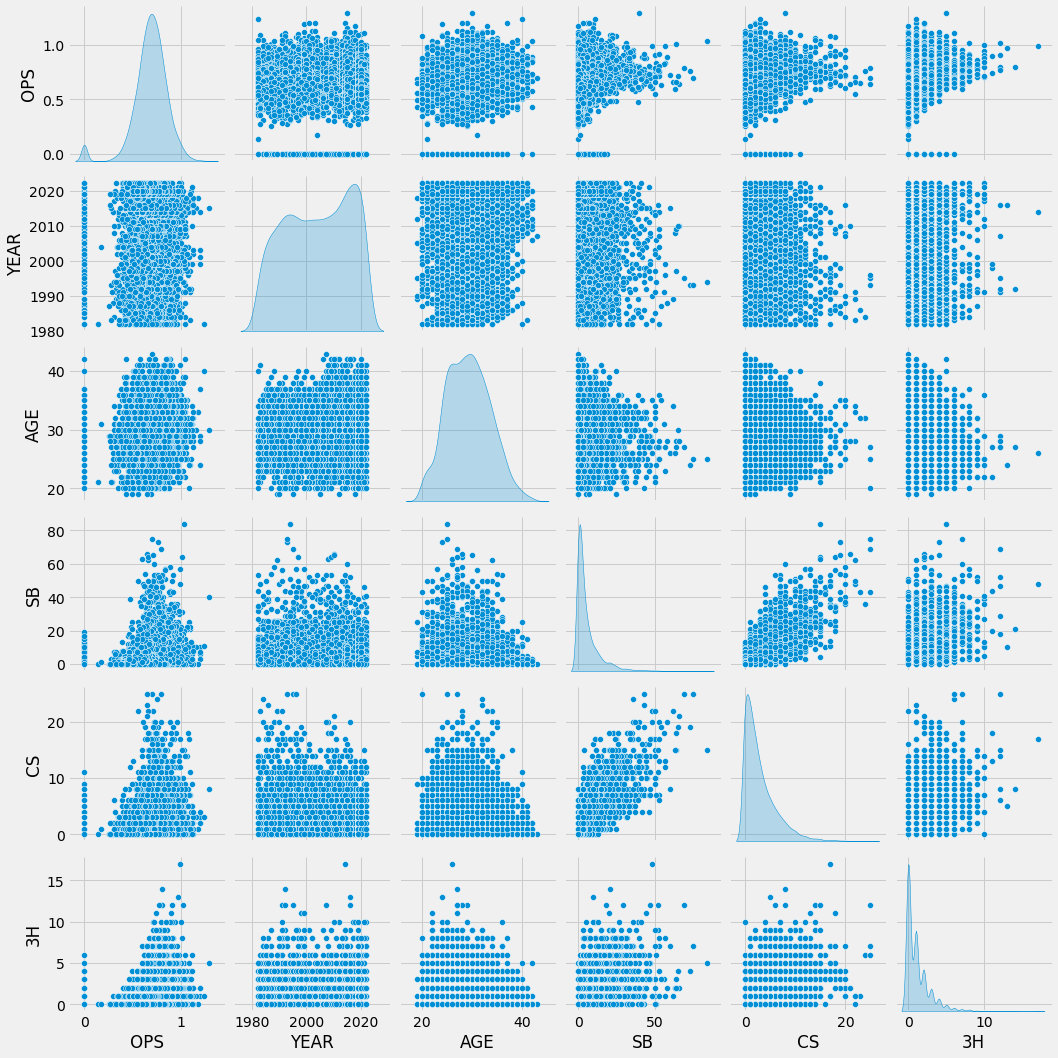

In [ ]:
# Top5. Low correlation with 'OPS' Pair Plot
print("Top5. Low correlation with 'OPS' Pair Plot")
low_corr = result.loc[:,['OPS']+list(correlations.head(7)[2:].index)]
sns.pairplot(low_corr,diag_kind='kde')
plt.show()

In [ ]:
# dtype이 object인 것과 OPS 추출
result_obj=result.loc[:,list(result.columns[result.dtypes=='object'])+['OPS']]

Text(0.5, 1.0, '포지션별 OPS violinplot')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_te

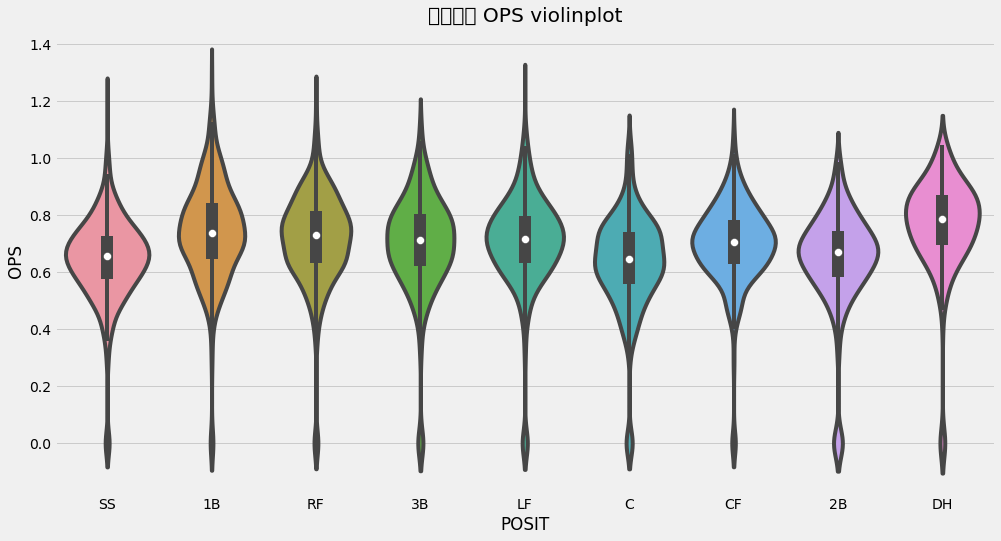

In [ ]:
# 포지션별 OPS violinplot 그려보기
plt.figure(figsize=(15,8))
sns.violinplot(x='POSIT',y='OPS',data=result_obj)
plt.title("포지션별 OPS violinplot")

In [ ]:

# 해당 시즌 이전까지의 누적 기록
result = pd.read_csv("/content/statiz_pre.csv", index_col=0)

result['1타'] = result['안타'] - result['2타'] - result['3타'] - result['홈런']

infos = ['ID','이름','생일','팀','시즌','포지션','나이']
stats = ['G','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4','삼진'\
        ,'병살','희타','희비','타율','출루','장타','OPS','wOBA','wRC+','WAR+']
new = ['나이','G','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4','삼진'\
        ,'병살','희타','희비','타율','출루','장타','OPS','wOBA','wRC+','WAR+']
result_fin = result[infos]

In [ ]:
def get_cumulative(player_age,stat=stats ,df=result):
    try:
        result_cum = df[(df['나이']==player_age)][stat]
        result_cum = result_cum.mean()
        
    except:
        result_cum = [np.nan for i in stat]
        result_cum = pd.Series(result_cum)
    
    return result_cum

result_fin[stats] = result.apply(lambda x: get_cumulative(x['나이']), axis=1)
result_fin
result_fin = result_fin.drop_duplicates(['나이'])
result_fin = result_fin.sort_values('나이').reset_index(drop=True)
result_fin = result_fin[new]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Text(0.5, 1.0, '포지션별 OPS violinplot')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

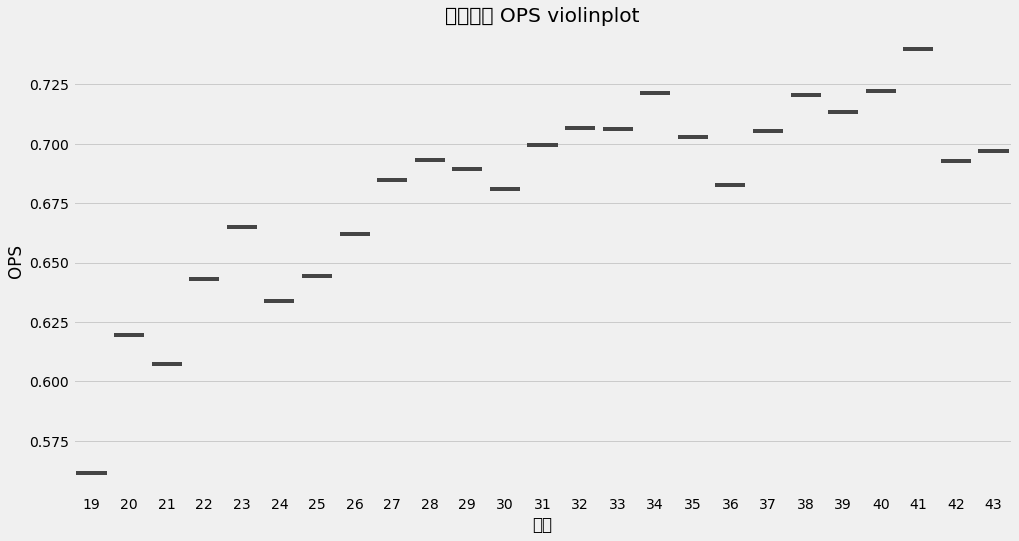

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+
0,0,이종범,1970-08-15,해,1994,SS,25,124.0,561.0,499.0,...,2.0,1.0,4.0,0.393,0.452,0.581,1.033,0.462,198.3,11.77
1,1,테임즈,1986-11-10,N,2015,1B,30,142.0,595.0,472.0,...,7.0,0.0,7.0,0.381,0.498,0.790,1.288,0.530,222.3,10.71
2,2,심정수,1975-05-05,현,2003,RF,29,133.0,601.0,460.0,...,14.0,0.0,8.0,0.335,0.478,0.720,1.197,0.498,210.7,10.19
3,0,이종범,1970-08-15,해,1997,SS,28,125.0,577.0,484.0,...,9.0,0.0,3.0,0.324,0.428,0.581,1.009,0.431,173.2,9.70
4,0,이종범,1970-08-15,해,1996,SS,27,113.0,525.0,449.0,...,4.0,0.0,2.0,0.332,0.425,0.566,0.991,0.440,184.6,9.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2192,임종찬,2001-09-28,한,2021,RF,21,42.0,146.0,132.0,...,2.0,1.0,0.0,0.152,0.228,0.212,0.440,0.217,18.7,-1.06
10033,1845,박찬호,1995-06-05,K,2020,SS,26,141.0,530.0,479.0,...,14.0,12.0,3.0,0.221,0.274,0.273,0.548,0.254,40.2,-1.14
10034,1998,정보근,1999-08-31,롯,2020,C,22,85.0,152.0,133.0,...,7.0,6.0,1.0,0.150,0.219,0.165,0.385,0.187,-3.9,-1.19
10035,1808,나종덕,1998-03-16,롯,2019,C,22,104.0,209.0,185.0,...,5.0,7.0,2.0,0.124,0.188,0.195,0.383,0.180,-4.2,-1.41


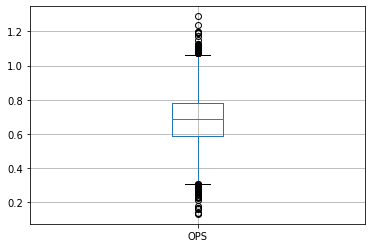

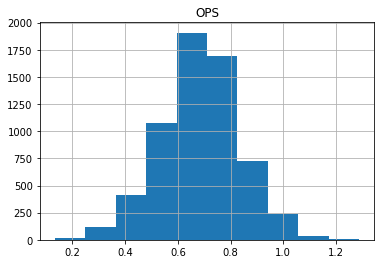

In [50]:
# 타석 50 미만의 선수 제거 적은 표본으로 이상치및 결측치 제거
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm 
result = pd.read_csv("/content/statiz_pre.csv", index_col=0)

result.drop(result.loc[result['타석']<30].index, inplace=True)
result.drop(result.loc[result['OPS']==0.0].index, inplace=True)

result.boxplot(column=['OPS'])
result.hist(column=['OPS'])

result.to_csv("/content/statiz_e.csv")
result